### Carregando os arquivos em memoria - Parte 1

In [65]:
import pandas as pd

# Tabelas a serem trabalhadas -> Processamento
path_processa_americana ='/content/ProcessaAmericanas.csv'
path_processa_mesa ='/content/ProcessaMesa.csv'
path_processa_sem ='/content/ProcessaSemclass.csv'
path_processa_vinifiras ='/content/ProcessaViniferas.csv'

df_processa_americanas = pd.read_csv('/content/ProcessaAmericanas.csv', sep=';')
df_processa_mesa       = pd.read_csv('/content/ProcessaMesa.csv', sep=';')
df_processa_sem_class  = pd.read_csv('/content/ProcessaSemclass.csv', sep=';')
df_processa_viniferas  = pd.read_csv('/content/ProcessaViniferas.csv', sep=';')

df_processa_americana = pd.read_csv(path_processa_americana, sep=';')
df_processa_mesa = pd.read_csv(path_processa_mesa, sep=';')
df_processa_sem = pd.read_csv(path_processa_sem, sep=';')
df_processa_viniferas = pd.read_csv(path_processa_vinifiras, sep=';')

### Desenvolvimento Tabelas de **Processamento**

In [99]:
import matplotlib.pyplot as plt
import pandas as pd


# Carregar os dados dos arquivos CSV
filePath = '/Users/felipeassaf/Downloads/filesMarcelo/content'
filePath= ''
df_processa_americana = pd.read_csv(filePath + 'ProcessaAmericanas.csv', sep=';')
df_processa_mesa = pd.read_csv(filePath + 'ProcessaMesa.csv', sep=';')
df_processa_sem = pd.read_csv(filePath + 'ProcessaSemclass.csv', sep=';')
df_processa_viniferas = pd.read_csv(filePath + 'ProcessaViniferas.csv', sep=';')

# Agrupar todas as tabelas e um unico DF
df_processa_tinta_brancos = pd.concat([df_processa_americana, df_processa_mesa, df_processa_viniferas])


# Analise 1 => Apenas Tintas e Brancas Rosadas tabelas agrupadas
df_processa_n1_tinta_brancos = df_processa_tinta_brancos[(df_processa_tinta_brancos.cultivar !='TINTAS')]
df_processa_n1_tinta_brancos = df_processa_n1_tinta_brancos[(df_processa_n1_tinta_brancos.cultivar !='BRANCAS E ROSADAS')]

# Analise 2 => Exceto Tintas e Brancas Rosadas tabelas agrupadas
df_processa_tinta_brancos = df_processa_tinta_brancos[df_processa_tinta_brancos['cultivar'].str.contains('^(TINTAS|BRANCAS E ROSADAS)$', regex=True)]

# Analise 3 => Apenas  Tintas e Brancas Rosadas tabela Viniferas
df_processa_viniferas = df_processa_viniferas[df_processa_viniferas['cultivar'].str.contains('^(TINTAS|BRANCAS E ROSADAS)$', regex=True)]
df_processa_viniferas = df_processa_viniferas[['cultivar','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]

#Analise 4 => Exceto Tintas e Brancas Rosadas tabelas agrupadas
df_processa_viniferas = df_processa_viniferas[df_processa_viniferas['cultivar'].str.contains('^(TINTAS|BRANCAS E ROSADAS)$', regex=True)]


# Filtro dos Anos - Apenas os ultimos 15
df_processa_tinta_brancos = df_processa_tinta_brancos[['cultivar','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]
df_processa_n1_tinta_brancos = df_processa_n1_tinta_brancos[['cultivar','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]

# Agrupar as uvas por cultivar
df_processa_agrupado = df_processa_tinta_brancos.groupby('cultivar').sum()
df_processa_n_agrupados = df_processa_n1_tinta_brancos.groupby('cultivar').sum()
dfViniferasAgrupados = df_processa_viniferas.groupby('cultivar').sum()


# Conseguir somar e trazer apenas as maiores 3 uvas
df_processa_n_agrupados = df_processa_n_agrupados.transpose()
vlr = df_processa_n_agrupados.sum()
df_processa_n_agrupados = df_processa_n_agrupados[vlr.sort_values(ascending=False).index[:3]]
df_processa_n_agrupados = df_processa_n_agrupados.transpose()


# Transpor o DataFrame
df_processa_agrupado = df_processa_agrupado.transpose()
df_processa_n_agrupados = df_processa_n_agrupados.transpose()
dfViniferasAgrupados = dfViniferasAgrupados.transpose()


<ipython-input-99-95b2a9e59a78>:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_processa_tinta_brancos = df_processa_tinta_brancos[df_processa_tinta_brancos['cultivar'].str.contains('^(TINTAS|BRANCAS E ROSADAS)$', regex=True)]
<ipython-input-99-95b2a9e59a78>:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_processa_viniferas = df_processa_viniferas[df_processa_viniferas['cultivar'].str.contains('^(TINTAS|BRANCAS E ROSADAS)$', regex=True)]
<ipython-input-99-95b2a9e59a78>:29: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_processa_viniferas = df_processa_viniferas[df_processa_viniferas['cultivar'].str.contains('^(TINTAS|BRANCAS E ROSADAS)$', regex=True)]
<ipython-input-99-95b2a9e59a78>:37: FutureWarning: The defaul

### **Gráfricos**

<Figure size 2200x800 with 0 Axes>

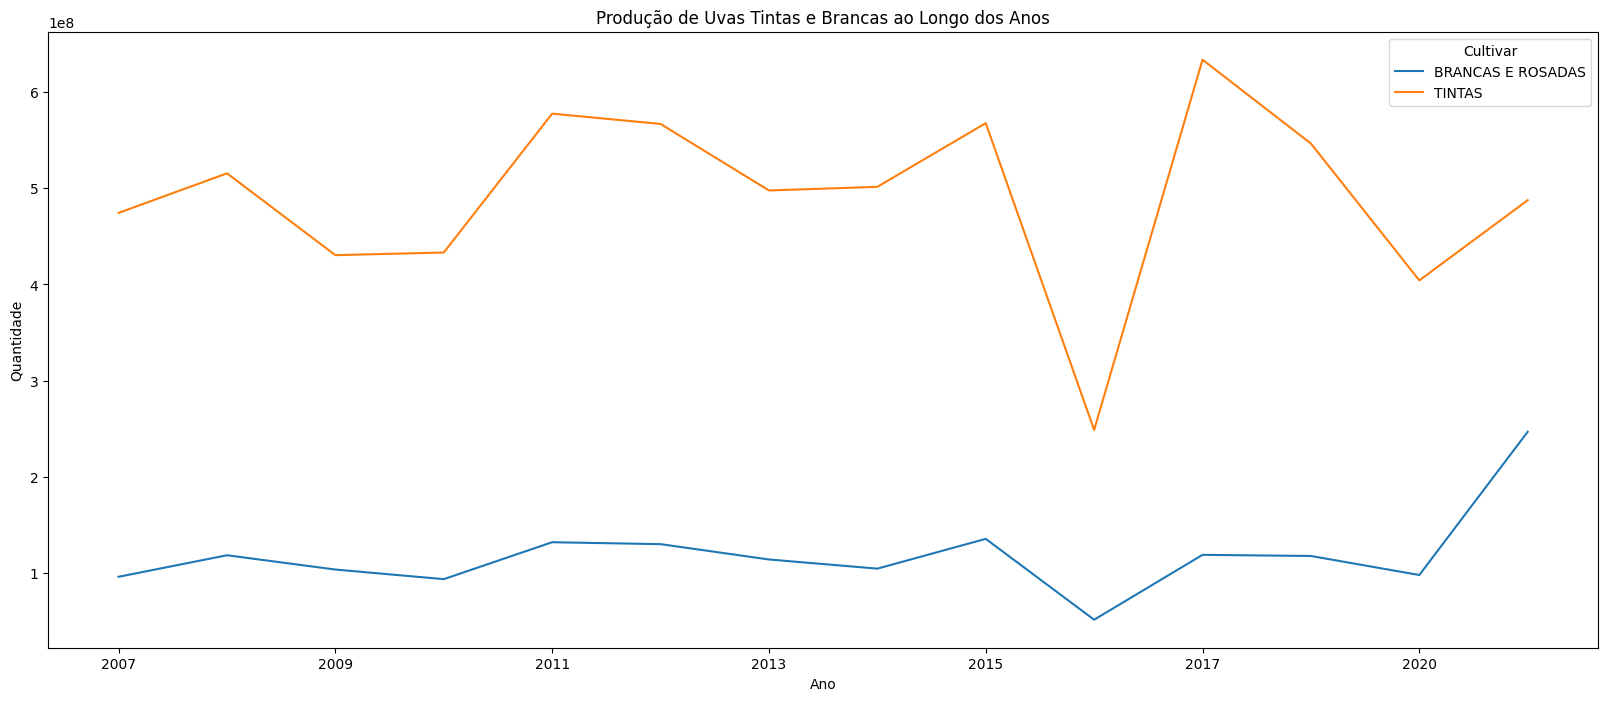

In [108]:
# Plotar o gráfico Geral Produção de Tintas|Brancas e Rosadas
df_processa_agrupado.plot(kind='line', figsize = (20,8))
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Produção de Uvas Tintas e Brancas ao Longo dos Anos')
plt.legend(title='Cultivar')
plt.show()


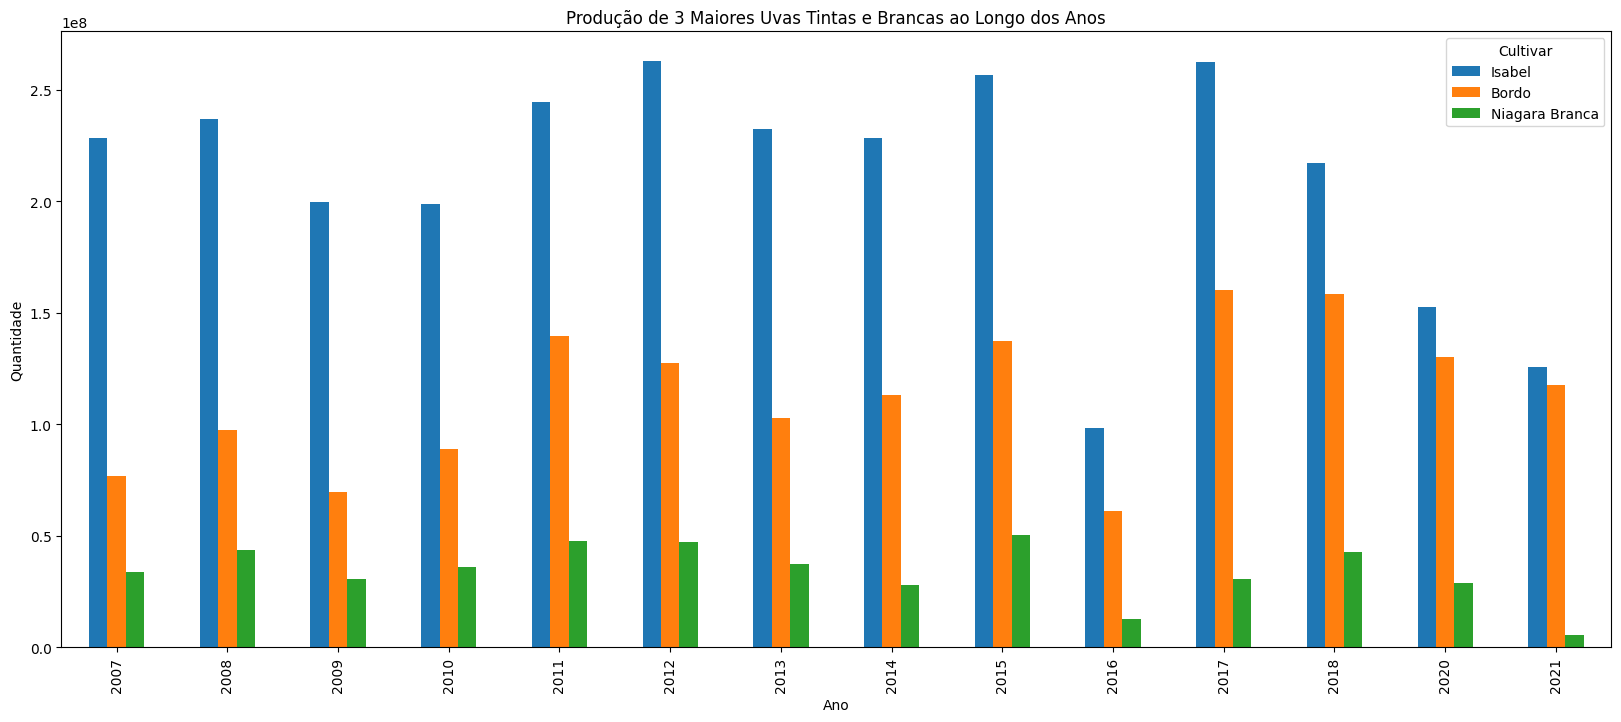

In [109]:
# Plotar o gráfico Geral das 3 Maiores produção de uvas
df_processa_n_agrupados.plot(kind='bar', figsize = (20,8))
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Produção de 3 Maiores Uvas Tintas e Brancas ao Longo dos Anos')
plt.legend(title='Cultivar')
plt.show()

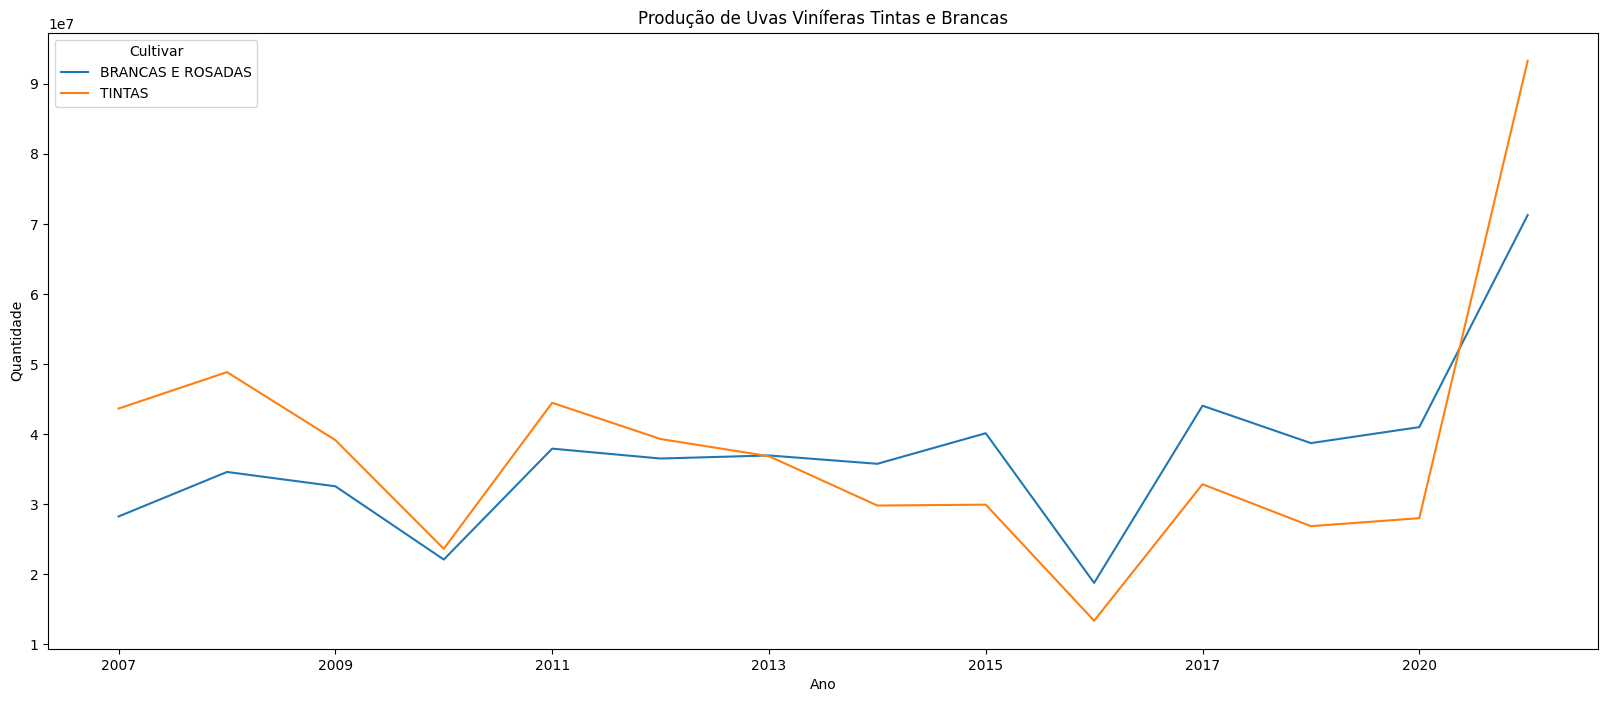

In [110]:
# Plotar o gráfico de linhas Viniferas
dfViniferasAgrupados.plot(kind='line', figsize = (20,8))
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Produção de Uvas Viníferas Tintas e Brancas')
plt.legend(title='Cultivar')
plt.show()

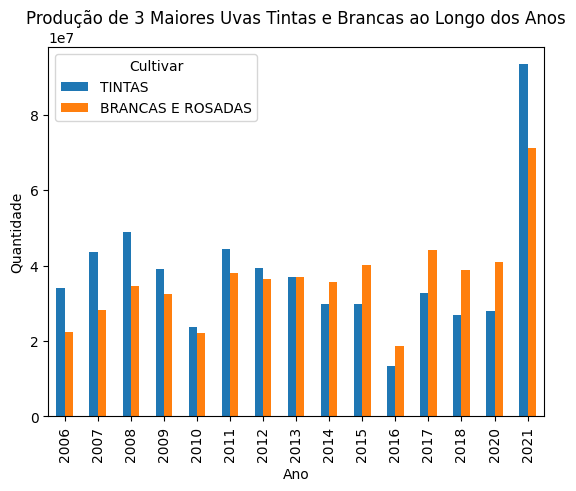

In [94]:
# Plotar o gráfico de linhas Geral Uvas
dfViniferas_n_Agrupados.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Produção de 3 Maiores Uvas Tintas e Brancas ao Longo dos Anos')
plt.legend(title='Cultivar')
plt.show()